In [1]:
import torch #main frame work we used to perform high dimension tensor calculation
import torch.nn as nn #this class we used to define Custom Neural Network Architecture
from torch.utils.data import Dataset,DataLoader #this Dataset class we used split the entire data into chunks based on Batch_sizes
#where as DataLoader class we used to load data and perform action over it.

from sklearn.model_selection import train_test_split #this class we used to split the data into train or test sets
from sklearn.preprocessing import StandardScaler,MinMaxScaler 
#above this class used to do input scaling so that variance of all field would be same for models

import pandas as pd
from cloudpickle import pickle #this class we used to convert datastructure into bytes stream
import seaborn as sb #to see the visualization.

In [2]:
#if i want to show gpu is avilable or not in system.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

### Now Loading Dataset and doing EDA over it

In [3]:
data = pd.read_csv(filepath_or_buffer="insurance.csv",encoding="utf-8")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


### step:1 checking for Null value

In [4]:
100 * data.isnull().sum()/data.shape[0] 

age               0.0
sex               0.0
bmi               0.0
children          0.0
smoker            0.0
region            0.0
charges           0.0
insuranceclaim    0.0
dtype: float64

### step:2 checking for duplicated record

In [5]:
data.duplicated().sum()

1

In [6]:
#to see which records showing duplicacy
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
581,19,1,30.59,0,0,1,1639.5631,1


In [7]:
#dropping those duplocate records from data.
data.drop_duplicates(keep="first",inplace=True,ignore_index=True)

In [8]:
#again checking duplicated record deleted or not.
data.duplicated().sum()

0

### step:3 checking for target variable

In [9]:
data.insuranceclaim.value_counts(normalize=True,ascending=False,dropna=False) #both the classes are balanced in data.

insuranceclaim
1    0.584892
0    0.415108
Name: proportion, dtype: float64

### step:4 splitting the data into training set or testing set

In [10]:
#selecting input and output variable
x = data.drop(labels="insuranceclaim",axis=1)
y = data["insuranceclaim"]

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y) 
#stratify ensure both class distribution goes same to both sets(train or test)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1069, 7), (268, 7), (1069,), (268,))

In [12]:
#to show the dtype and dimension of train test split data
print(f"Training set dimension: {x_train.ndim} and Testing set dimension: {x_test.ndim}")
print(f"Training set dtype:   {x_train.dtypes} and Testing set dtype: {x_test.dtypes}")
print(f"Training set type:   {type(x_train)} and Testing set type: {type(x_test)}")

Training set dimension: 2 and Testing set dimension: 2
Training set dtype:   age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object and Testing set dtype: age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object
Training set type:   <class 'pandas.core.frame.DataFrame'> and Testing set type: <class 'pandas.core.frame.DataFrame'>


```
| Task Type                                | Input dtype     | Target dtype    | Loss Function          |
| ---------------------------------------- | --------------- | --------------- | ---------------------- |
| **Binary Classification (Sigmoid)**      | `torch.float32` | `torch.float32` | `nn.BCEWithLogitsLoss` |
| **Multi-class Classification (Softmax)** | `torch.float32` | `torch.long`    | `nn.CrossEntropyLoss`  |


```

In [13]:
x_train.head()

,age,sex,bmi,children,smoker,region,charges
1290,19,1,34.900,0,1,3,34828.65400
359,18,0,20.790,0,0,2,1607.51010
579,25,0,23.465,0,0,0,3206.49135
662,18,1,33.660,0,0,2,1136.39940
1167,32,1,35.200,2,0,3,4670.64000


In [14]:
y_train.head()

1290    1
359     0
579     0
662     1
1167    0
Name: insuranceclaim, dtype: int64

### step:5 now doing input scaling converting into numpy object

In [15]:
#creating an object of standardscaler class.
ss = StandardScaler()

#now applying scaling on input data.
x_train_ss = ss.fit_transform(x_train.astype("float32")) #converting dataframe 2d object to 2d numpy object
x_test_ss  = ss.transform(x_test.astype("float32"))      #Transforming testing dataframe 2d object to 2d numpy object
print(f"Training set dimension: {x_train_ss.ndim}  and Testing set dimension: {x_test_ss.ndim}")
print(f"Training set dtype:     {x_train_ss.dtype} and Testing set dtype: {x_test_ss.dtype}")
print(f"Training set type:      {type(x_train_ss)} and Testing set type: {type(x_test_ss)}")

Training set dimension: 2  and Testing set dimension: 2
Training set dtype:     float32 and Testing set dtype: float32
Training set type:      <class 'numpy.ndarray'> and Testing set type: <class 'numpy.ndarray'>


In [16]:
#converting target variable set to numpy object.
import numpy as np
y_train_np = np.array(object=y_train,dtype=np.float32)
y_test_np = np.array(object=y_test,dtype=np.float32)
print(f"Training set dimension: {y_train_np.ndim} and Testing set dimension: {y_test_np.ndim}")
print(f"Training set type:   {type(y_train_np)} and Testing set type: {type(y_test_np)}")

Training set dimension: 1 and Testing set dimension: 1
Training set type:   <class 'numpy.ndarray'> and Testing set type: <class 'numpy.ndarray'>


### step:6 converting numpy object to tensor object

In [17]:
x_train_tensor = torch.from_numpy(x_train_ss)
x_test_tensor = torch.from_numpy(x_test_ss)
y_train_tensor = torch.from_numpy(y_train_np)
y_test_tensor = torch.from_numpy(y_test_np)
print(f"Training set tensor: {type(x_train_tensor)} and Testing set tensor: {type(x_test_tensor)}")

Training set tensor: <class 'torch.Tensor'> and Testing set tensor: <class 'torch.Tensor'>


In [18]:
x_train_tensor,y_train_tensor

(tensor([[-1.4381,  0.9879,  0.7013,  ...,  2.0106,  1.3720,  1.8369],
         [-1.5094, -1.0122, -1.6309,  ..., -0.4974,  0.4717, -0.9687],
         [-1.0101, -1.0122, -1.1888,  ..., -0.4974, -1.3291, -0.8337],
         ...,
         [-0.8675,  0.9879, -0.2491,  ...,  2.0106,  0.4717,  0.4365],
         [ 1.0582, -1.0122,  0.3343,  ..., -0.4974, -1.3291, -0.1819],
         [ 0.3450, -1.0122,  0.2781,  ..., -0.4974,  0.4717, -0.4598]]),
 tensor([1., 0., 0.,  ..., 1., 1., 1.]))

### step:7 using custom dataset class to split into chuks based on batch_size

In [19]:
class CustomDataset(Dataset):
    #defining the constructor method to initialize instance variable
    def __init__(self,input_data,output_data):
        self.input_data  = input_data
        self.output_data = output_data
        
    #to see the shape of input data we used special method
    def __len__(self):
        return len(self.input_data)
    
    #to split the data into chunks based on batch_size
    def __getitem__(self, index):
        return self.input_data[index],self.output_data[index]

### step:8 getting training dataset or tesing dataset

In [20]:
#creating an object of CustomDataset class.
training_dataset = CustomDataset(input_data=x_train_tensor,output_data=y_train_tensor)
testing_dataset  = CustomDataset(input_data=x_test_tensor,output_data=y_test_tensor)


### step:9 converting training or testing dataset into dataloader object that split chunks based on batch_size

In [21]:
training_dataloader   = DataLoader(dataset=training_dataset,batch_size=16,shuffle=True,pin_memory=True)
testing_dataloader = DataLoader(dataset=testing_dataset,batch_size=16,shuffle=True,pin_memory=True)

In [22]:
for feature,label in testing_dataloader:
    print(feature)
    print(label)
    break

tensor([[ 0.9156, -1.0122,  2.3211,  1.5896, -0.4974,  1.3720, -0.1407],
        [ 0.9869, -1.0122, -1.1417,  0.7595, -0.4974, -1.3291, -0.1139],
        [ 0.0597,  0.9879,  0.0360,  2.4197, -0.4974, -0.4287, -0.4151],
        [-1.5094, -1.0122,  1.5748, -0.9008, -0.4974, -1.3291, -0.9172],
        [ 0.7016,  0.9879, -0.8359,  0.7595,  2.0106,  1.3720,  0.8638],
        [ 0.4876, -1.0122,  2.8781,  0.7595, -0.4974, -1.3291, -0.3078],
        [-0.3682,  0.9879,  1.8963,  0.7595, -0.4974,  0.4717, -0.6717],
        [-0.0116, -1.0122,  0.5690,  1.5896, -0.4974,  1.3720, -0.4780],
        [-1.2954, -1.0122,  0.4913,  0.7595, -0.4974, -0.4287, -0.8022],
        [ 0.4876, -1.0122, -0.4309, -0.0707, -0.4974,  0.4717, -0.4092],
        [ 0.0597,  0.9879, -0.9400,  0.7595, -0.4974,  0.4717, -0.5476],
        [ 0.1310,  0.9879,  1.5872, -0.9008, -0.4974,  0.4717, -0.6223],
        [ 1.5575, -1.0122,  0.4418,  2.4197, -0.4974,  0.4717,  1.9849],
        [-0.0829,  0.9879, -2.2879,  0.7595, -0.497

In [23]:
for feature,label in training_dataloader:
    print(feature)
    print(label)
    break

tensor([[ 6.3029e-01, -1.0122e+00,  9.7812e-01, -9.0080e-01, -4.9737e-01,
         -4.2871e-01, -3.7217e-01],
        [ 1.3104e-01,  9.8791e-01, -3.7227e-01, -7.0666e-02, -4.9737e-01,
         -4.2871e-01, -5.4163e-01],
        [-1.5094e+00, -1.0122e+00, -2.4665e-01, -9.0080e-01, -4.9737e-01,
         -1.3291e+00, -4.8597e-01],
        [ 1.4862e+00,  9.8791e-01,  3.5416e-01, -9.0080e-01,  2.0106e+00,
          1.3720e+00,  3.3370e+00],
        [ 7.0161e-01,  9.8791e-01,  1.0236e+00, -9.0080e-01, -4.9737e-01,
          4.7167e-01, -4.1823e-01],
        [-1.2241e+00,  9.8791e-01,  6.8473e-01,  1.5896e+00, -4.9737e-01,
          1.3720e+00, -8.1371e-01],
        [-5.1086e-01,  9.8791e-01,  7.5085e-01,  7.5947e-01, -4.9737e-01,
          1.3720e+00, -7.1003e-01],
        [ 4.8765e-01,  9.8791e-01, -8.0284e-01,  3.2499e+00, -4.9737e-01,
          1.3720e+00, -2.5176e-01],
        [ 1.7001e+00,  9.8791e-01, -1.4871e+00, -7.0666e-02, -4.9737e-01,
         -4.2871e-01,  1.0742e-01],
        [ 

### step:10 now defining deep neural network Architecture

In [24]:
import torch.nn.init as init
class SimpleNeuralNetworkArchitecture(nn.Module):
    #defining the instance variable 
    def __init__(self,input_size,output_size):
        
        #using super method to all inherit property from parent class.
        super().__init__()
        
        #defining linear and non linear layer in Hidden layer.
        self.linear1 = nn.Linear(in_features=input_size,out_features=64)  #first hidden layer
        self.relu1 =  nn.ReLU()
        
        self.linear2 = nn.Linear(in_features=64,out_features=32)          #second hidden layer
        self.relu2 =  nn.ReLU()
        
        self.linear3 = nn.Linear(in_features=32,out_features=8)           #third hidden layer
        self.relu3 =  nn.ReLU()
        
        self.linear4 = nn.Linear(in_features=8,out_features=output_size)  # output layer
        
        #calling the Initialize weights and biases method
        self._init_weights()
        
        
        
    #now initializing the weight and bias before starting the training using xavier and glorat or he maining
    #i will used relu in hidden layer or sigmoid output layer
    
    def _init_weights(self):
        #Hidden layers → ReLU → He Normal.
        init.kaiming_normal_(self.linear1.weight,nonlinearity="relu") #inplace operation updating directly
        init.zeros_(self.linear1.bias)
        
        #Hidden layers2 → ReLU → He Normal.
        init.kaiming_normal_(self.linear2.weight,nonlinearity="relu")
        init.zeros_(self.linear2.bias)
        
        #Hidden layers3 → ReLU → He Normal.
        init.kaiming_normal_(self.linear3.weight,nonlinearity="relu")
        init.zeros_(self.linear3.bias)
        
        #output layers → sigmoid → xavier or glorat uniform.
        init.xavier_uniform_(self.linear4.weight)
        init.zeros_(self.linear4.bias)
        
    #whenever we started training first algortithm work in neural network forward pass
    def forward(self, x): #where x is input feature data
        x = self.relu1(self.linear1(x))
        x = self.relu2(self.linear2(x))
        x = self.relu3(self.linear3(x))
        x = torch.sigmoid(self.linear4(x))
        return x

In [25]:
x_train_tensor.shape,x_train_tensor.shape[1]

(torch.Size([1069, 7]), 7)

### calling the neural network architecture class

In [26]:
#now creating an object of Custom neural network class
model = SimpleNeuralNetworkArchitecture(input_size=x_train_tensor.shape[1],output_size=1).to(device=device)
model

SimpleNeuralNetworkArchitecture(
  (linear1): Linear(in_features=7, out_features=64, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=64, out_features=32, bias=True)
  (relu2): ReLU()
  (linear3): Linear(in_features=32, out_features=8, bias=True)
  (relu3): ReLU()
  (linear4): Linear(in_features=8, out_features=1, bias=True)
)

### to show the summary of model how many trainiable parameter need to be trained

In [27]:
#if i want to see how many trainable parameter need to be trained by this model
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                   Param #
SimpleNeuralNetworkArchitecture          --
├─Linear: 1-1                            512
├─ReLU: 1-2                              --
├─Linear: 1-3                            2,080
├─ReLU: 1-4                              --
├─Linear: 1-5                            264
├─ReLU: 1-6                              --
├─Linear: 1-7                            9
Total params: 2,865
Trainable params: 2,865
Non-trainable params: 0

#### step:11) defining the loss function and type of optimizer will used at time of training

In [28]:
#target are binary classifier so loss function binary cross entropy.
loss_fxn = nn.BCELoss() #calculate loss value

#optimizers i am using Adam they will updates the trainable parameter effectively in each layer.
optimizer = torch.optim.Adam(params=model.parameters(),lr=0.0001)

### step:12) Now starting the models

In [ ]:
epochs=50
training_loss_lst = []
testing_loss_lst = []
for i in range(epochs):
    #performing model training
    model.train()
    training_running_loss_count = 0
    
    #based on batchsize data record we are passing to neural network architecture.
    for feature,label in training_dataloader:
        feature = feature.to(device)
        label   = label.to(device)
        
        #whenever we start training the model first algorithm work is forward propogation
        pred_output = model.forward(feature)
        #print(f"actual output shape: {label.shape}")
        #print(f"predicted output shape: {pred_output.shape}")
        
        #calculating the loss value by using Loss fxns or evaluating the performance of model at time of training.
        loss_value = loss_fxn(pred_output.squeeze(1),label)
        
        #now updating the training_running_loss_count variable
        training_running_loss_count = training_running_loss_count+loss_value.item() 
        #this item method we used to get value from shape of tensor
        
        #before applying backpropogation to the loss value first we have to clear the gradient inside optimizers
        optimizer.zero_grad()
        
        #reducing the loss value by using backpropogation algorithm and calcualting gradient of loss wrt to trainable parameter
        loss_value.backward()
        
        #using optimizers updating the tainable parameters
        optimizer.step()
        
    avg_training_loss = (training_running_loss_count)/(len(training_dataloader))
    training_loss_lst.append(avg_training_loss)

    
    #performing model testing(on testing we dont apply any backpropogation,overfitting technique,early stopping)
    model.eval()
    testing_running_loss_count = 0
    
    with torch.no_grad(): #at time of testing or inferencing gradient tracking is off
        #based on batchsize data record we are passing to neural network architecture.
        for feature,label in testing_dataloader:
            feature = feature.to(device)
            label   = label.to(device)
            
            #whenever we start training the model first algorithm work is forward propogation
            pred_output = model.forward(feature)
            
            #calculating the loss value by using Loss fxns or evaluating the performance of model at time of training.
            loss_value = loss_fxn(pred_output.squeeze(1),label)
            
            #updating the count of loss in testing_running_loss_count
            testing_running_loss_count = testing_running_loss_count+loss_value.item()
            
        avg_testing_loss = (testing_running_loss_count)/(len(testing_dataloader))
        testing_loss_lst.append(avg_testing_loss)
            
    print(f"Epoch [{i+1}/{epochs}], "
          f"Train Loss: {avg_training_loss:.4f}, "
          f"Test Loss: {avg_testing_loss:.4f}, "
          )


        

Epoch [1/50], Train Loss: 0.7458, Test Loss: 0.6991, 
Epoch [2/50], Train Loss: 0.6371, Test Loss: 0.6144, 
Epoch [3/50], Train Loss: 0.5683, Test Loss: 0.5618, 
Epoch [4/50], Train Loss: 0.5201, Test Loss: 0.5278, 
Epoch [5/50], Train Loss: 0.4851, Test Loss: 0.4981, 
Epoch [6/50], Train Loss: 0.4575, Test Loss: 0.4758, 
Epoch [7/50], Train Loss: 0.4355, Test Loss: 0.4601, 
Epoch [8/50], Train Loss: 0.4175, Test Loss: 0.4450, 
Epoch [9/50], Train Loss: 0.4036, Test Loss: 0.4381, 
Epoch [10/50], Train Loss: 0.3914, Test Loss: 0.4252, 
Epoch [11/50], Train Loss: 0.3802, Test Loss: 0.4159, 
Epoch [12/50], Train Loss: 0.3712, Test Loss: 0.4077, 
Epoch [13/50], Train Loss: 0.3624, Test Loss: 0.4032, 
Epoch [14/50], Train Loss: 0.3548, Test Loss: 0.4020, 
Epoch [15/50], Train Loss: 0.3484, Test Loss: 0.3895, 
Epoch [16/50], Train Loss: 0.3410, Test Loss: 0.3847, 
Epoch [17/50], Train Loss: 0.3345, Test Loss: 0.3791, 
Epoch [18/50], Train Loss: 0.3295, Test Loss: 0.3730, 
Epoch [19/50], Trai

### to visualize the training and testing loss

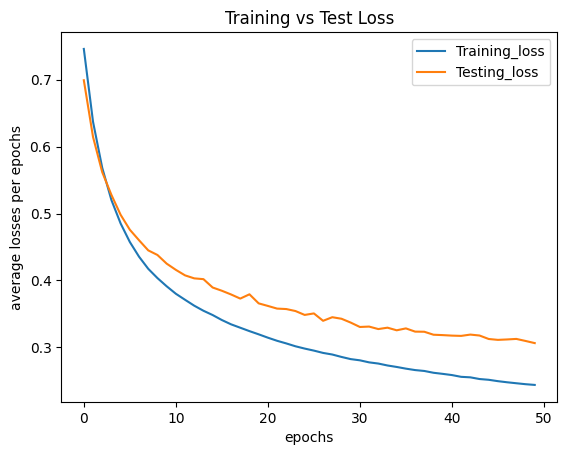

In [30]:
import matplotlib.pyplot as plt
plt.plot(training_loss_lst,label="Training_loss")
plt.plot(testing_loss_lst,label="Testing_loss")
plt.xlabel("epochs")
plt.ylabel("average losses per epochs")
plt.title('Training vs Test Loss')
plt.legend()
plt.show()